In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully! ✅")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")

Dataset loaded successfully! ✅


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.isnull().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [ ]:
# Drop the 'license' column due to excessive missing values
df.drop('license', axis=1, inplace=True)

# Fill missing 'house_rules' with a placeholder
df['house_rules'].fillna('Not Specified', inplace=True)

# Fill numerical columns with their median
df['reviews per month'].fillna(df['reviews per month'].median(), inplace=True)
df['review rate number'].fillna(df['review rate number'].median(), inplace=True)

# Fill missing 'Construction year' with the mode (most frequent year)
df['Construction year'].fillna(df['Construction year'].mode()[0], inplace=True)

df.dropna(subset=['last review', 'NAME', 'host name'], inplace=True)

print("Missing values handled.")

Missing values handled.


In [ ]:
# Clean and convert price-related columns to numeric
# The provided CSV does not seem to have '$', but this is a robust way to handle it.
for col in ['price', 'service fee']:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '')
    # Convert to numeric, coercing errors to NaN (which we can handle later if any appear)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'last review' to datetime objects
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Convert 'Construction year' to an integer
df['Construction year'] = df['Construction year'].astype(int)

print("Data types corrected.")

Data types corrected.


In [ ]:
# Drop columns that are not required for general analysis
df.drop(['id', 'host id', 'country', 'country code'], axis=1, inplace=True)
print("Irrelevant columns removed.")

Irrelevant columns removed.


In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicate rows removed.")

Number of duplicate rows: 2923
Duplicate rows removed.


In [ ]:
# Final check of the data's info
print("\n--- Final Data Info ---")
df.info()

# Final check for any remaining null values
print("\n--- Remaining Missing Values ---")
print(df.isnull().sum())


--- Final Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 83227 entries, 0 to 102057
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NAME                            83227 non-null  object        
 1   host_identity_verified          82991 non-null  object        
 2   host name                       83227 non-null  object        
 3   neighbourhood group             83205 non-null  object        
 4   neighbourhood                   83211 non-null  object        
 5   lat                             83220 non-null  float64       
 6   long                            83220 non-null  float64       
 7   instant_bookable                83142 non-null  float64       
 8   cancellation_policy             83165 non-null  object        
 9   room type                       83227 non-null  object        
 10  Construction year               83227 non-null  i

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

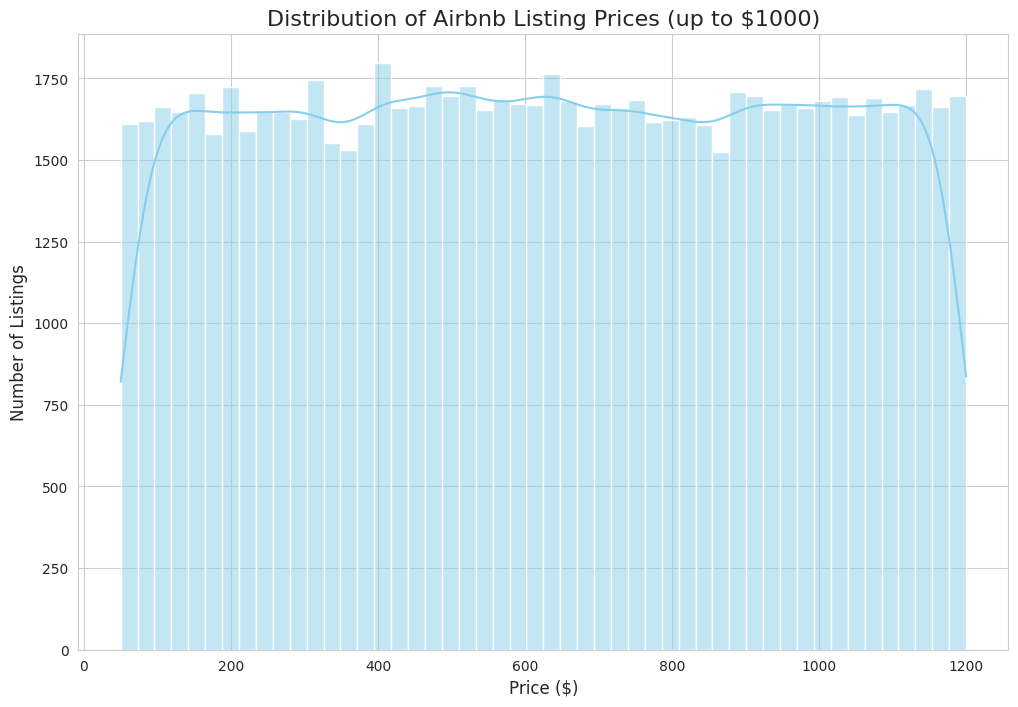


**Insight 1: Price Distribution**
This chart shows that the vast majority of listings are priced under $400, with a large concentration between $50 and $200. This is the most competitive price range. Pricing a property significantly above this range requires strong justification through superior amenities, location, or reviews.



In [ ]:
  # --- Chart 1: Distribution of Listing Prices ---
plt.figure()
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Airbnb Listing Prices (up to $1000)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()
print("""
**Insight 1: Price Distribution**
This chart shows that the vast majority of listings are priced under $400, with a large concentration between $50 and $200. This is the most competitive price range. Pricing a property significantly above this range requires strong justification through superior amenities, location, or reviews.
""")

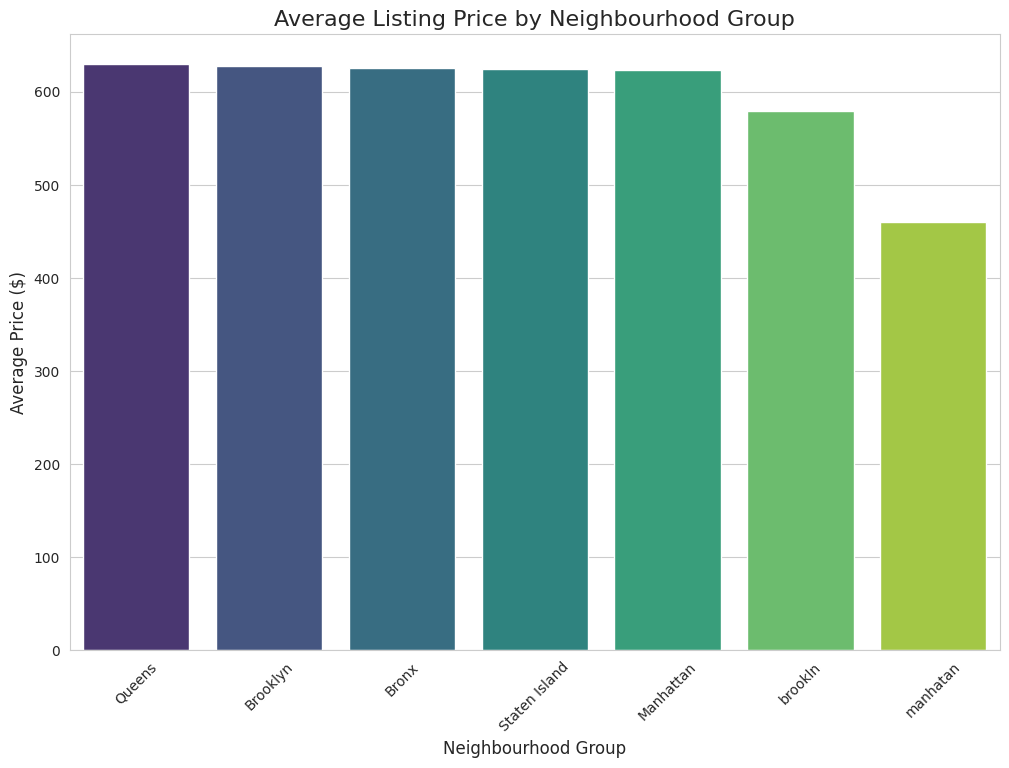


**Insight 2: Location is Key**
Manhattan has the highest average listing price, significantly more than other boroughs. This confirms that location is a primary driver of price. Hosts in prime locations like Manhattan can command higher prices, while hosts in other areas must be more competitive.



In [ ]:
# --- Chart 2: Average Price by Neighbourhood Group ---
plt.figure()
avg_price_neighbourhood = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_neighbourhood.index, y=avg_price_neighbourhood.values, palette='viridis')
plt.title('Average Listing Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()
print("""
**Insight 2: Location is Key**
Manhattan has the highest average listing price, significantly more than other boroughs. This confirms that location is a primary driver of price. Hosts in prime locations like Manhattan can command higher prices, while hosts in other areas must be more competitive.
""")

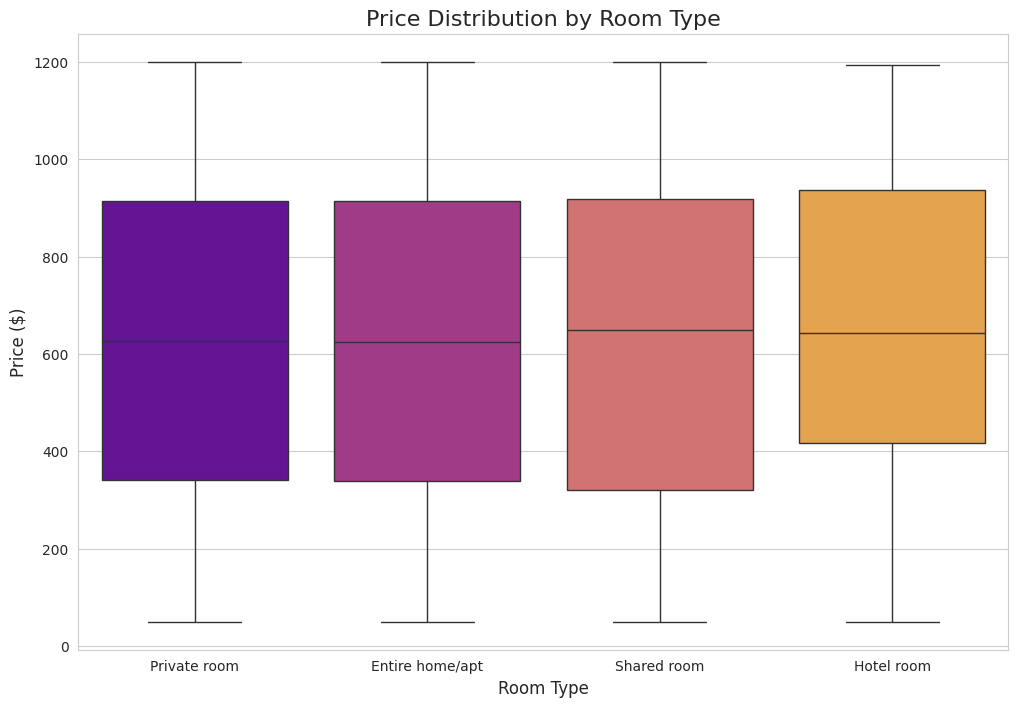


**Insight 3: Property Type Matters**
'Entire home/apt' listings are consistently priced higher than 'Private room' or 'Shared room'. This indicates that guests are willing to pay a premium for privacy and space. Hosts offering an entire apartment have a higher revenue potential.



In [ ]:
# --- Chart 3: Price Distribution by Room Type ---
plt.figure()
sns.boxplot(data=df, x='room type', y='price', palette='plasma')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()
print("""
**Insight 3: Property Type Matters**
'Entire home/apt' listings are consistently priced higher than 'Private room' or 'Shared room'. This indicates that guests are willing to pay a premium for privacy and space. Hosts offering an entire apartment have a higher revenue potential.
""")

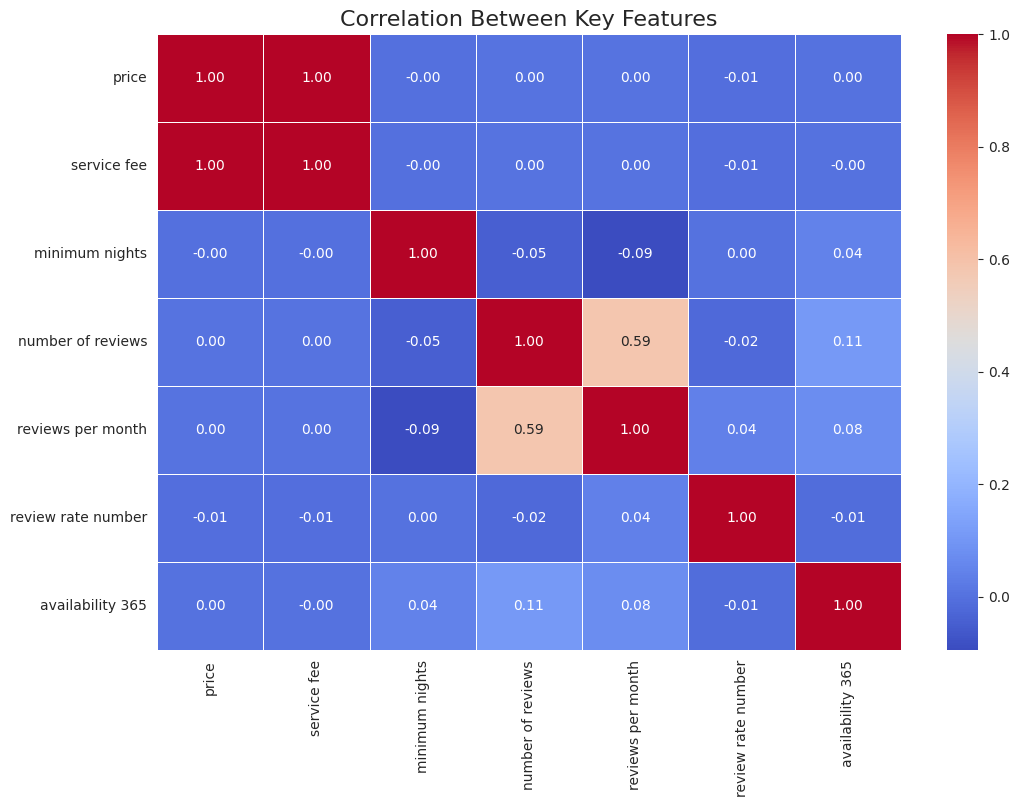


**Insight 4: What Drives Price?**
The heatmap shows a strong positive correlation between 'price' and 'service fee', which is expected. Interestingly, there is a weak positive correlation between 'price' and 'availability 365', suggesting that more expensive properties might also be more readily available. Other factors like 'number of reviews' and 'review rate number' have a very weak correlation with price, indicating that while important, they are not the primary drivers of cost in this dataset.



In [ ]:
# --- Chart 4: Correlation Heatmap of Numerical Features ---
plt.figure()
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
# We select a subset of interesting columns for clarity
corr_cols = ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365']
corr_matrix = numerical_cols[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Key Features')
plt.show()
print("""
**Insight 4: What Drives Price?**
The heatmap shows a strong positive correlation between 'price' and 'service fee', which is expected. Interestingly, there is a weak positive correlation between 'price' and 'availability 365', suggesting that more expensive properties might also be more readily available. Other factors like 'number of reviews' and 'review rate number' have a very weak correlation with price, indicating that while important, they are not the primary drivers of cost in this dataset.
""")